## Работа с изображениями

In [4]:
# импортируем имеющиеся в библиотеке skimage фотографии
from skimage import data
 
# и уже известные нам библиотеки matplotlib и numpy
import matplotlib.pyplot as plt
import numpy as np

Черно-белые изображения

In [5]:
# импортируем черно-белую фотографию
camera_img = data.camera()

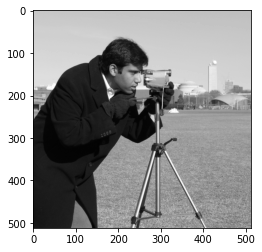

In [6]:
# воспользуемся функцией imshow для показа изображения
# по умолчанию, imshow преобразует черно-белые фото в цветные, 
# чтобы этого не происходило, нужно указать параметр cmap='gray'
plt.imshow(camera_img, cmap = 'gray')

In [7]:
# посмотрим на тип данных
type(camera_img)

numpy.ndarray

In [8]:
# посмотрим на размерность (вертикаль х горизонталь)
camera_img.shape

(512, 512)

In [9]:
# и общее количество пикселей (512 х 512)
camera_img.size

262144

In [10]:
# каждое значение состоит из целых чисел длиной 8 бит
camera_img.dtype

dtype('uint8')

In [11]:
# диапазон этого значения (т.е. оттенков), как мы и говорили, от черного (0) до белого (255)
camera_img.min(), camera_img.max()

(0, 255)

In [12]:
# задав координаты конкретного пикселя, мы можем посмотреть его оттенок
camera_img[50,50]

207

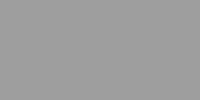

In [13]:
# посмотрим, что это за цвет, создав картинку в библиотеке PIL
from PIL import Image

# mode = 'L' указывает, что это ч/б изображение, размером 200 х 100
# и оттенком серого как раз 158
sample1 = Image.new(mode = 'L', size = (200, 100), color = 158)
sample1

Цветные изображения

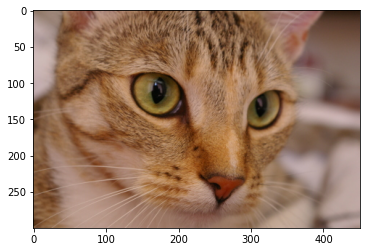

In [14]:
# импортируем цветную фотографию
cat_img = data.chelsea()
 
# и выведем ее на экран
plt.imshow(cat_img)

In [15]:
# посмотрим на размерность
cat_img.shape

(300, 451, 3)

In [16]:
# атрибут size в данном случае отражает количество пикселей с учётом трёх цветов
cat_img.size

405900

In [17]:
# аналогично черно-белому изображению, мы можем посмотреть оттенки красного, зелёного и синего конкретного пикселя
cat_img[50, 50]

array([138,  98,  63], dtype=uint8)

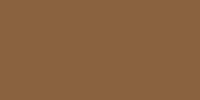

In [18]:
# опять же воспользуемся PIL для визуализации этого цвета
sample2 = Image.new(mode = "RGB", size = (200, 100), color = (138,  98,  63))
sample2

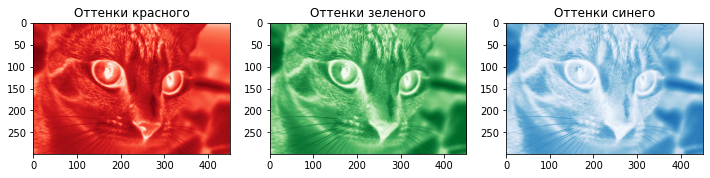

In [19]:
# функция subplots дает возможность вывести сразу несколько изображений
# в качестве параметров передаем количество строк и столбцов сетки изображений (1 x 3)
# и размер графиков
fig, ax = plt.subplots(1, 3, figsize = (12, 4))

# и выводим каждое изображение по отдельности

# сначала только красные оттенки, слой [0]
# также нужно принудительно задать cmap = 'Reds'
ax[0].imshow(cat_img[:,:,0], cmap = 'Reds')
# также зададим заголовок
ax[0].set_title('Оттенки красного')

# потом только зеленые, слой [1]
ax[1].imshow(cat_img[:,:,1], cmap = 'Greens')
ax[1].set_title('Оттенки зеленого')

# и наконец только синие, слой [2]
ax[2].imshow(cat_img[:,:,2], cmap = 'Blues')
ax[2].set_title('Оттенки синего');

Гистограмма

In [ ]:
# воспользуемся еще одной библиотекой популярной библиотекой OpenCV
import cv2

Функции calcHist мы передаем следующие параметры:

image: само изображение [camera_img]
channels: для ч/б фотографии это [0]
mask: так как мы строим гистограмму всего изображения, то фильтр или срез (mask) равен None
histSize: количество интервалов (bins) [256]
ranges: диапазон оттенков [0,256]

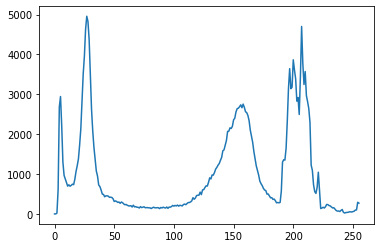

In [20]:
# для начала выведем ч/б гистограмму 
hist_gray = cv2.calcHist([camera_img], [0], None, [256], [0, 256])
plt.plot(hist_gray)

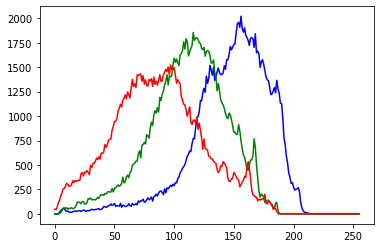

In [ ]:
# цветной гистограмме мы передадим параметры в формате "синий, зеленый, красный"
color = ('b','g','r')

# в цикле for пройдемся по цветам ('b','g','r') 
# и соответствующим каналам [0, 1, 2] с помощью enumerate
for channel, col in enumerate(color):

    # здесь параметры схожи, только каналов теперь три
    hist_color = cv2.calcHist([cat_img], [channel], None, [256], [0, 256])

    # строим на каждой итерации цикла по кривой и берем для нее цвет из color
    plt.plot(hist_color, color = col)

### Обработка изображений

Вырезание фрагмента

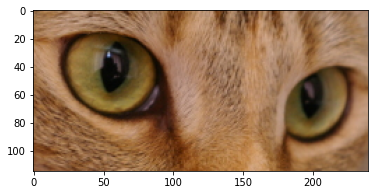

In [ ]:
# мы можем вырезать фрагмент изображения по координатам
# например, покажем только глаза кошки
eyes = cat_img[70:185, 115:355]
plt.imshow(eyes)

Закрашивание изображения

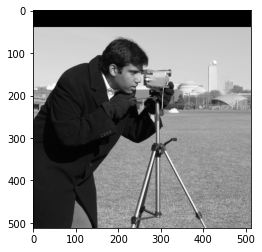

In [ ]:
# кроме того мы можем закрасить часть изображения
# например, создать черную полосу, задав цвет 0 (черный) первым 40 строкам массива
camera_img[:40] = 0
plt.imshow(camera_img, cmap = 'gray')

Преобразование цветного в черно-белое изображение

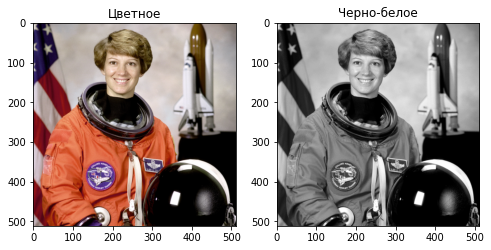

In [ ]:
# библиотека skimage также позволяет преобразовывать цветные изображения в чёрно-белые
from skimage.color import rgb2gray

# импортируем еще одно фото из библиотеки
color_img = data.astronaut()

# воспользуемся функцией rgb2gray
grayscale_img = rgb2gray(color_img)

# снова возьмем уже знакомую функцию subplots
fig, ax = plt.subplots(1, 2, figsize = (8, 4))

# выведем первое изображение и зададим заголовок
ax[0].imshow(color_img)
ax[0].set_title('Цветное')

# для ч/б изображения не забудем про параметр cmap = 'gray'
ax[1].imshow(grayscale_img,  cmap = 'gray')
ax[1].set_title('Черно-белое')

plt.show()

In [ ]:
# проверим
print (color_img.shape, grayscale_img.shape)

(512, 512, 3) (512, 512)


Трансформации

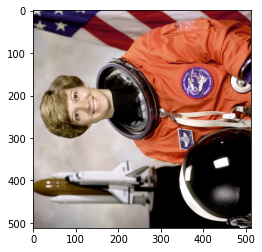

In [ ]:
# к изображению можно применять различные трансформации
# например, поворачивать
 
# применяем транспонирование матрицы к координатам пикселей
# по большому счету, меняем местами 0 и 1
color_img = np.transpose(color_img, (1, 0, 2))
plt.imshow(color_img)

Пороговое преобразование

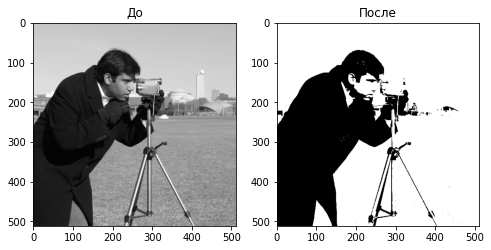

In [ ]:
# вновь импортируем ч/б изображение
camera_img_2 = data.camera()

# если значение пикселя ниже 87, сделаем его черным, выше - белым
binary = camera_img_2 > 87

# теперь сравним исходное изображение и изображение после преобразования
fig, ax = plt.subplots(1, 2, figsize = (8, 4))

# выведем первое изображение и зададим заголовок
ax[0].imshow(camera_img_2,  cmap = 'gray')
ax[0].set_title('До')

# для ч/б изображения не забудем про параметр cmap = 'gray'
ax[1].imshow(binary,  cmap = 'gray')
ax[1].set_title('После')

plt.show()

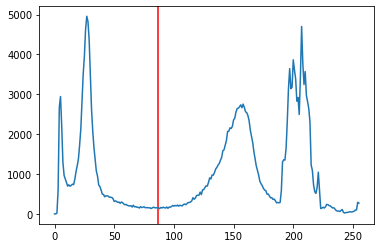

In [ ]:
# воспользуемся уже известной функцией calcHist
t_hist = cv2.calcHist([camera_img_2], [0], None, [256], [0, 256])
# и добавим прямую с пороговым значением красного цвета
plt.axvline(87, color = 'r')
plt.plot(t_hist)